# (21) Nardin play

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *


# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Load h file

- Data file path on ```M1```:
    - /Data/MT/xtracted_python/ALL_tres25.h5

In [2]:
path = ConfigVAE('fixate1', save=False).h_file
file = h5py.File(path)
list(file)

['CRCNS', 'NARDIN', 'YUWEI']

In [3]:
print(dict(file.attrs))

{
    'CRCNS_expts': array(['clu004_Cell1', 'clu014_Cell2', 'clu014_Cell3', 'clu015_Cell4',
       'clu018_Cell5', 'clu023_Cell6', 'clu024_Cell7', 'clu025_Cell8',
       'clu025_Cell9', 'clu026_Cell10', 'clu036_Cell11', 'clu037_Cell12',
       'clu038_Cell13', 'clu039_Cell14', 'clu040_Cell15', 'clu042_Cell16',
       'clu043_Cell17', 'clu044_Cell18', 'clu053_Cell19', 'clu055_Cell20',
       'clu059_Cell21', 'clu061_Cell22', 'clu064_Cell23', 'clu068_Cell24',
       'clu069_Cell25', 'clu081_Cell26', 'clu082_Cell27', 'clu082_Cell28',
       'clu087_Cell29', 'clu088_Cell30', 'clu089_Cell31', 'clu090_Cell32',
       'clu095_Cell33', 'clu096_Cell34', 'clu099_Cell35', 'clu104_Cell36',
       'clu107_Cell37', 'clu108_Cell38', 'clu109_Cell39', 'clu110_Cell40',
       'clu116_Cell41', 'clu120_Cell42', 'clu126_Cell43', 'clu131_Cell44',
       'clu132_Cell45', 'clu142_Cell46', 'clu144_Cell47', 'clu145_Cell48',
       'clu146_Cell49', 'clu147_Cell50', 'clu148_Cell51', 'clu180_Cell52',
       'clu181_Cell53', 'clu181_Cell54', 'clu183_Cell55', 'clu209_Cell64',
       'clu209_Cell65', 'clu209_Cell66', 'clu209_Cell67', 'clu209_Cell68',
       'clu209_Cell69', 'clu209_Cell70', 'clu216_Cell71', 'clu221_Cell72',
       'clu221_Cell73', 'clu221_Cell74', 'clu221_Cell75', 'clu221_Cell76',
       'clu222_Cell56', 'clu222_Cell57', 'clu223_Cell77', 'clu223_Cell78',
       'clu223_Cell79', 'clu223_Cell80', 'clu223_Cell81', 'clu224_Cell58',
       'clu224_Cell59', 'clu225_Cell60', 'clu226_Cell61', 'clu227_Cell62',
       'clu227_Cell63', 'clu229_Cell82', 'clu229_Cell83', 'clu229_Cell84'],
      dtype=object),
    'CRCNS_nch': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    'NARDIN_expts': array(['slu020', 'slu021', 'slu023', 'slu049', 'slu053', 'slu054',
       'slu057', 'slu059', 'slu061', 'ytu289', 'ytu291', 'ytu292',
       'ytu293', 'ytu294', 'ytu295', 'ytu296', 'ytu297', 'ytu298',
       'ytu299', 'ytu300', 'ytu301', 'ytu303', 'ytu304'], dtype=object),
    'NARDIN_nch': array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32]),
    'YUWEI_expts': array(['clu036', 'clu037', 'clu038', 'clu039', 'clu040', 'clu043',
       'clu044', 'clu053', 'clu055', 'clu059', 'clu061', 'clu064',
       'clu068', 'clu069', 'clu081', 'clu082', 'clu087', 'clu088',
       'clu089', 'clu090', 'clu095', 'clu096', 'clu099', 'clu104',
       'clu107', 'clu108', 'clu109', 'clu110', 'clu116', 'clu120',
       'clu126', 'clu131', 'clu132', 'clu142', 'clu145', 'clu146',
       'clu147', 'clu148', 'clu180', 'clu181', 'clu183', 'clu209',
       'clu216', 'clu221', 'clu222', 'clu223', 'clu224', 'clu225',
       'clu226', 'clu227', 'clu229', 'clu267', 'clu292', 'clu293',
       'clu294', 'clu295', 'ytu021', 'ytu023', 'ytu028', 'ytu029'],
      dtype=object),
    'YUWEI_nch': array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 16, 16, 16,  1, 16,  1,  1,  1,  1, 16,
       16, 16, 16, 16, 16, 16, 16, 24, 24])
}

In [4]:
nardin_expts = file.attrs.get('NARDIN_expts')
print(f"There are a total of {len(nardin_expts)} experiments:\n\n{nardin_expts}")

There are a total of 23 experiments:

['slu020' 'slu021' 'slu023' 'slu049' 'slu053' 'slu054' 'slu057' 'slu059'
 'slu061' 'ytu289' 'ytu291' 'ytu292' 'ytu293' 'ytu294' 'ytu295' 'ytu296'
 'ytu297' 'ytu298' 'ytu299' 'ytu300' 'ytu301' 'ytu303' 'ytu304']

## Load spreadsheet

- Excel file path on ```M1```:
    - /Data/MT/xtracted_python/latest_plxfileslabeled.xlsx

In [5]:
path = '/home/hadi/Documents/MTMST-other/Nardin/latest_plxfileslabeled.xlsx'
excel = pd.read_excel(path, sheet_name='good units', header=1)

### Turn it into pandas dataframe

In [6]:
df = []
for i, row in excel.iterrows():
    expt, _, channel, unit, good, tag_nardin = row
    if str(expt) == 'nan':
        continue
    if tag_nardin in ['mt', 'mst']:
        tag = tag_nardin
    else:
        tag = '?'
    df.append({
        'expt': [expt[:-1]],
        'channel': [int(channel)],
        'unit': [int(unit)],
        'good': [str(good)],
        'tag': [str(tag)],
        'tag_nardin': [str(tag_nardin)],
    })
df = pd.DataFrame(merge_dicts(df))

In [7]:
df

,expt,channel,unit,good,tag,tag_nardin
0,ytu202,1,1,yes,mt,mt
1,ytu202,2,1,yes,?,mt?
2,ytu202,2,2,no,?,nan
3,ytu202,3,1,yes,mt,mt
4,ytu202,3,2,no,?,nan
...,...,...,...,...,...,...
192,slu023,59,2,no,?,nan
193,slu023,60,1,no,?,nan
194,slu023,61,1,no,?,nan
195,slu023,61,2,no,?,nan


### Extract some info from the df

- How many neurons per experiment:

In [8]:
collections.Counter(df['expt'])

Counter({'ytu202': 54, 'ytu205': 42, 'slu023': 101})

- how many reliable labels:
    - this is from all cells in the spreadsheep

In [9]:
collections.Counter(df['tag'])

Counter({'mt': 19, '?': 143, 'mst': 35})

- Take that one experiment (```slu023```) that we have both data and info about:
    - ...and count number of labeled cells in this experiment

In [10]:
df_slu023 = df.loc[df['expt'] == 'slu023'].reset_index()
collections.Counter(df_slu023['tag'])

Counter({'mt': 6, 'mst': 13, '?': 82})

- good units in ```slu023```

In [11]:
df_good_units = df_slu023.loc[df_slu023['good'] == 'yes']
df_good_units

,index,expt,channel,unit,good,tag,tag_nardin
0,96,slu023,2,1,yes,mt,mt
1,97,slu023,3,1,yes,mt,mt
2,98,slu023,4,1,yes,mt,mt
3,99,slu023,4,2,yes,mt,mt
4,100,slu023,5,1,yes,mt,mt
5,101,slu023,5,2,yes,mt,mt
6,102,slu023,6,1,yes,mst,mst
8,104,slu023,7,1,yes,mst,mst
14,110,slu023,10,2,yes,?,mt?
19,115,slu023,13,1,yes,?,mst?


In [12]:
collections.Counter(df_good_units['tag'])

Counter({'mt': 6, 'mst': 11, '?': 3})

## Load data from h5 file

In [13]:
expt = 'slu023'
group = file['NARDIN'][expt]
list(group)

['badspks', 'hf_center', 'hf_params', 'lfp', 'spks']

### Full data (3 long repeats)

In [14]:
stim, spks, good_spks, *_ = load_ephys(group)
stim.shape, spks.shape, good_spks.shape

((43200, 2, 17, 17), (43200, 32, 2), (43200, 1))

### Take only the first part

In [15]:
nt = len(stim)
nt //= 3
nt

14400

In [16]:
stim = stim[:nt]
spks = spks[:nt]
good_spks = good_spks[:nt]
stim.shape, spks.shape, good_spks.shape

((14400, 2, 17, 17), (14400, 32, 2), (14400, 1))

### Prelim firing rate plot

In [17]:
no_nan_channels = (np.isnan(spks)).sum(0) == 0

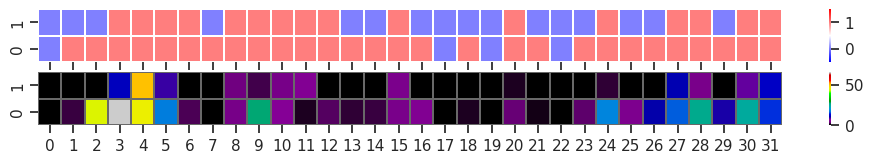

In [18]:
fig, axes = create_figure(2, 1, (12, 1.5), sharex='all')
sns.heatmap(
    no_nan_channels.T,
    cmap='bwr',
    linewidths=0.01,
    vmin=-0.5,
    vmax=1.5, 
    linecolor='w',
    ax=axes[0],
)
sns.heatmap(
    np.nansum(spks, 0).T / len(spks) / 25e-3,
    cmap='nipy_spectral',
    linewidths=0.01,
    linecolor='dimgrey',
    ax=axes[1],
)
for ax in axes.flat:
    ax.invert_yaxis()
plt.show()